# COMP5318 Assignment Stage 1, 2

## 1. Data Loading

In [1]:
import csv
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [2]:
Basketball_data = pd.read_csv('CollegeBasketballPlayers2009-2021.csv',header=0,low_memory=False)
type(Basketball_data)

pandas.core.frame.DataFrame

In [3]:
Basketball_data.head()

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000


## 2. Data Cleaning

In [4]:
# drop unrelated column
Basketball_data=Basketball_data.drop(columns=['Unnamed: 65', 'dunksmade',
                                            'dunksmiss+dunksmade','dunksmade/(dunksmade+dunksmiss)','type',
                                            'ht','team','conf','stops','player_name','Unnamed: 64','num'])
# transform column names
Basketball_data=Basketball_data.rename(columns={"Rec Rank": "rec_rank"})


In [5]:
# drop entries containing missing data
Basketball_data= Basketball_data.dropna()

# change categorical data into dummy variable
dummies = pd.get_dummies(Basketball_data['yr'],drop_first = True)
Basketball_data = pd.concat([Basketball_data,dummies], axis = 1)
Basketball_data=Basketball_data.drop(columns=['yr'])

### Information of the cleaned data

In [6]:
Basketball_data.shape
Basketball_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139 entries, 4619 to 60796
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GP                         1139 non-null   int64  
 1   Min_per                    1139 non-null   float64
 2   Ortg                       1139 non-null   float64
 3   usg                        1139 non-null   float64
 4   eFG                        1139 non-null   float64
 5   TS_per                     1139 non-null   float64
 6   ORB_per                    1139 non-null   float64
 7   DRB_per                    1139 non-null   float64
 8   AST_per                    1139 non-null   float64
 9   TO_per                     1139 non-null   float64
 10  FTM                        1139 non-null   int64  
 11  FTA                        1139 non-null   int64  
 12  FT_per                     1139 non-null   float64
 13  twoPM                      1139 non-null   i

## 3. Data Exploration

### 3.1 Distribution of the data

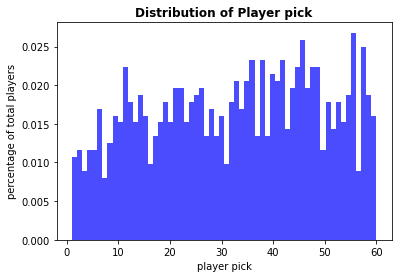

In [7]:
# histogram of pick to see distribution
pick = Basketball_data['pick']

n, bins, patches=plt.hist(pick,bins=60,
         density = 1, 
         color = 'blue',
         alpha = 0.7)
  
plt.xlabel('player pick')
plt.ylabel('percentage of total players')
 
plt.title("Distribution of Player pick",
          fontweight ="bold")
plt.plot()  

plt.savefig('Distribution_pick.jpg')

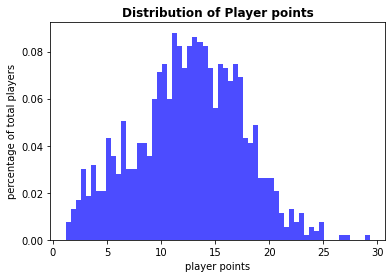

In [8]:
# histogram of pick to see distribution
pts = Basketball_data['pts']

n, bins, patches=plt.hist(pts,bins=60,
         density = 1, 
         color = 'blue',
         alpha = 0.7)
  
plt.xlabel('player points')
plt.ylabel('percentage of total players')
 
plt.title("Distribution of Player points",
          fontweight ="bold")
plt.plot()  
plt.savefig('Distribution_pts.jpg')

### 3.2 Correlation Matrics (Heatmap)

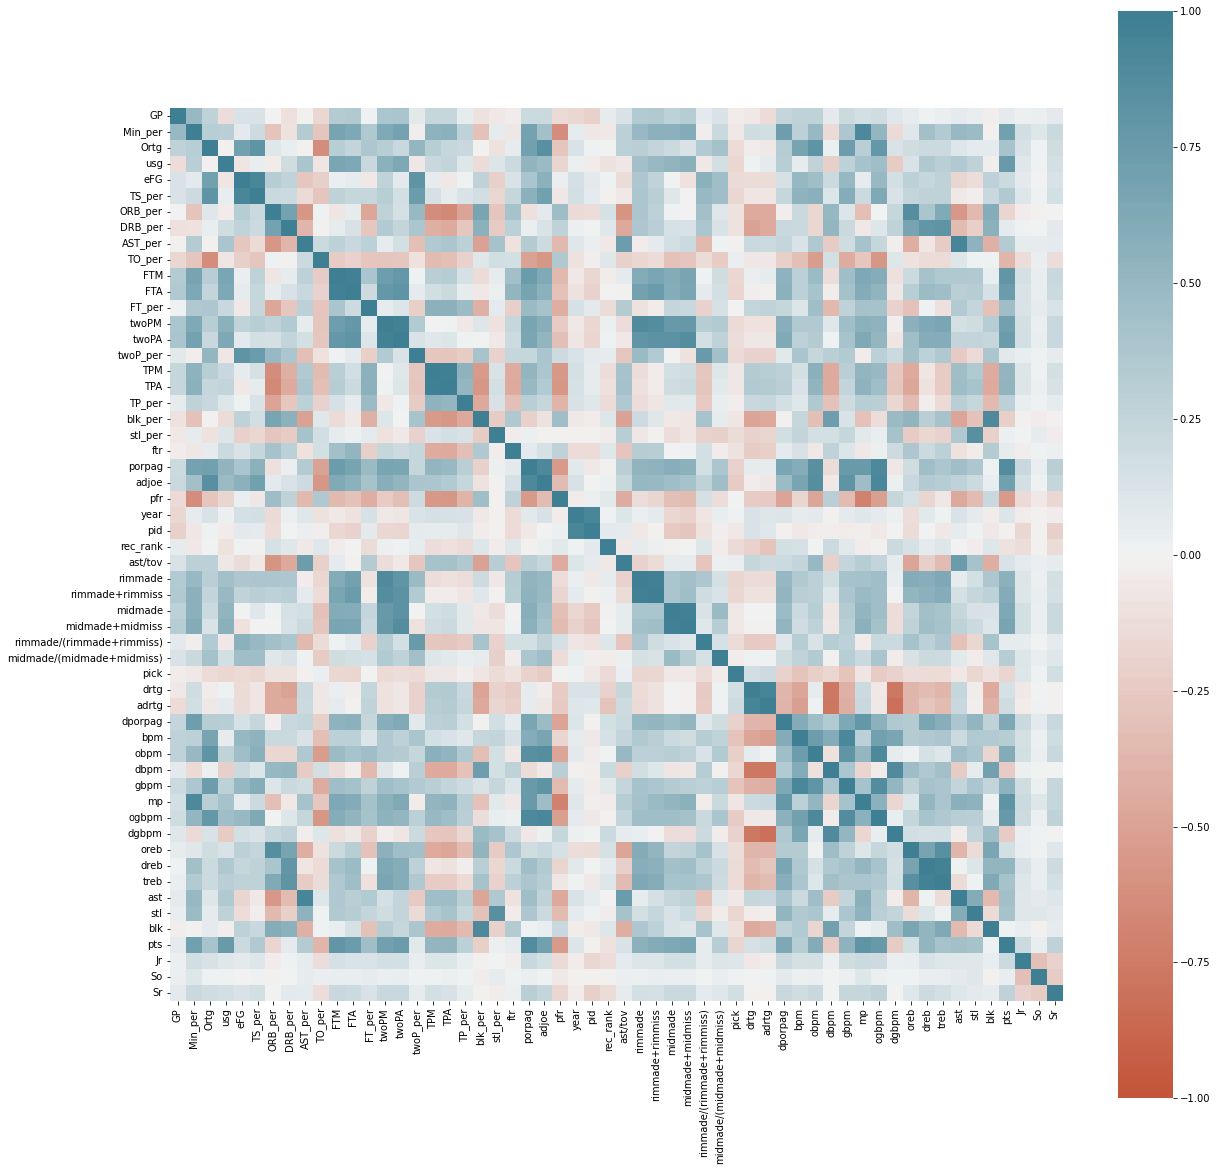

In [9]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,20)) 
corr = Basketball_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='center'
);
plt.plot()  

plt.savefig('correlation_hear_map.jpg')

## 4. Data Preprocessing

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

### 4.1 Normalisation and Standardisation

In [11]:
## predicting the points
data_train_point = Basketball_data.drop(labels='pts',axis=1).to_numpy()
data_train_label_point = Basketball_data.pts.to_numpy()
data_train_point = StandardScaler().fit_transform(data_train_point)
data_train_point = normalize(data_train_point)

## predicting the pick
data_train_pick = Basketball_data.drop(labels='pick',axis=1).to_numpy()
# data_train_label_pick = Basketball_data.pick.to_numpy()

# mapping the pick into 5 classes
data_train_label_pick = Basketball_data.pick.to_numpy().copy()
for index in range(len(data_train_label_pick)):
    if data_train_label_pick[index] > 30:
        data_train_label_pick[index] = 3
    elif data_train_label_pick[index] > 14:
        data_train_label_pick[index] = 2
    else:
        data_train_label_pick[index] = 1

data_train_pick = StandardScaler().fit_transform(data_train_pick)
data_train_pick = normalize(data_train_pick)

### 4.3 ML train test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#point question
X_train_point, X_test_point, y_train_point, y_test_point = train_test_split(
    data_train_point, data_train_label_point, random_state=0)
print("X_train shape:", X_train_point.shape)
print("y_train shape:", y_train_point.shape)
print("X_test shape:", X_test_point.shape)
print("y_test shape:", y_test_point.shape)

X_train shape: (854, 55)
y_train shape: (854,)
X_test shape: (285, 55)
y_test shape: (285,)


In [14]:
## pick question
from sklearn.model_selection import train_test_split
X_train_pick, X_test_pick, y_train_pick, y_test_pick = train_test_split(
    data_train_pick, data_train_label_pick, random_state=0, stratify = data_train_label_pick)
print("X_train shape:", X_train_pick.shape)
print("y_train shape:", y_train_pick.shape)
print("X_test shape:", X_test_pick.shape)
print("y_test shape:", y_test_pick.shape)

X_train shape: (854, 55)
y_train shape: (854,)
X_test shape: (285, 55)
y_test shape: (285,)


### 4.4 Dimention Reduction (PCA)

In [15]:
#point question
from sklearn.decomposition import PCA
pca = PCA(0.95)# choose minimal 95% of the principal components
pca.fit(data_train_point)
X_train_point = pca.transform(X_train_point)
X_test_point = pca.transform(X_test_point)
print("X_train shape:", X_train_point.shape)
print("y_train shape:", y_train_point.shape)
print("X_test shape:", X_test_point.shape)
print("y_test shape:", y_test_point.shape)

X_train shape: (854, 21)
y_train shape: (854,)
X_test shape: (285, 21)
y_test shape: (285,)


In [16]:
## pick question
pca = PCA(0.95)# choose minimal 95% of the principal components
pca.fit(data_train_pick)
X_train_pick = pca.transform(X_train_pick)
X_test_pick = pca.transform(X_test_pick)
print("X_train shape:", X_train_pick.shape)
print("y_train shape:", y_train_pick.shape)
print("X_test shape:", X_test_pick.shape)
print("y_test shape:", y_test_pick.shape)

X_train shape: (854, 20)
y_train shape: (854,)
X_test shape: (285, 20)
y_test shape: (285,)


# 5 Problem solving (ASM Stage 2)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math
import datetime

## 5.1 Prediction of the POINT

### 5.1.1 LinearRegression

In [18]:
#linear
point_lr = LinearRegression()
start = datetime.datetime.now()
point_lr.fit(X_train_point, y_train_point)
end = datetime.datetime.now()
training_time_lr = end-start
y_pred_point = point_lr.predict(X_test_point)

print('Model training time:', training_time_lr)
print('Intercept:', point_lr.intercept_)
print('Coefficients:\n', point_lr.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_point, y_pred_point))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_point, y_pred_point))
print('R Squared:', metrics.r2_score(y_test_point, y_pred_point,multioutput='variance_weighted'))
stderr_lr = math.sqrt(np.mean((y_train_point - point_lr.predict(X_train_point))**2))
print('Standard error:', stderr_lr)

Model training time: 0:00:00.001995
Intercept: 12.546047058343861
Coefficients:
 [-9.10842662 -2.78721063 -3.1688199  -2.19383392  2.91664328  0.68447646
  0.61371622  1.03527089 -1.18103962  4.53935083 -2.89425284 -2.62752769
  1.49240708 -0.96562195 -0.10699867 -3.80506163 -3.38914695 -0.64733812
 -1.62153918  2.29173208  1.6252917 ]
Mean Absolute Error: 0.9703581674098598
Mean Squared Error: 1.8112963367694779
R Squared: 0.9200494896551791
Standard error: 1.370601737000835


#### Cross validation on LinearRegression

In [19]:
cv_results = cross_validate(point_lr, X_train_point, y_train_point, cv=30)
sorted(cv_results.keys())
lr_r2=cv_results['test_score']
print('R-squared: %.3f (%.3f)' % (np.mean(cv_results['test_score']), np.std(cv_results['test_score'])))

R-squared: 0.917 (0.031)


#### 95% at confident interval of LinearRegerssion, the range of our prediction

In [20]:
print('\nPredictions from LinearRegression model should be within {:.2f} points at 95% confidence according to training data.'.format(2*stderr_lr))
se_test = math.sqrt(mean_squared_error(y_test_point, point_lr.predict(X_test_point)))
print('Predictions from LinearRegression model should be within {:.2f} points at 95% confidence according to test data.'.format(2*se_test))


Predictions from LinearRegression model should be within 2.74 points at 95% confidence according to training data.
Predictions from LinearRegression model should be within 2.69 points at 95% confidence according to test data.


#### Residual plot


Residual plot for training data (blue) and test data (green) in LinearRegression model:


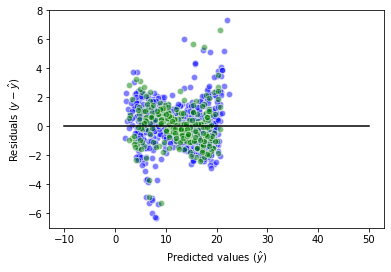

In [21]:
print('\nResidual plot for training data (blue) and test data (green) in LinearRegression model:')
_ = plt.scatter(point_lr.predict(X_train_point), y_train_point-point_lr.predict(X_train_point), c='blue', s=40, alpha=0.5, edgecolor='white')
_ = plt.scatter(point_lr.predict(X_test_point), y_test_point-point_lr.predict(X_test_point), c='green', s=40, alpha=0.5, edgecolor='white')
_ = plt.plot([-10,50], [0,0], c='black')
_ = plt.ylabel('Residuals ($y - \hat{y}$)')
_ = plt.xlabel('Predicted values ($\hat{y}$)')

### 5.1.2 Support Vector Regression

In [22]:
# hyperparameter tuning
svr_param_grid = {'kernel':['linear', 'rbf', 'sigmoid'],
              'C' :[0.1,1,5,10,15,20]}

print("Parameter grid:\n{}".format(svr_param_grid))
svr_grid_search = GridSearchCV(svm.SVR(), svr_param_grid, cv = 5, 
                               return_train_score=True,n_jobs =-1)
svr_grid_search.fit(X_train_point, y_train_point)

print("R2 score: {:.2f}".format(svr_grid_search.score(X_test_point,y_test_point)))
print("Best parameters: {}".format(svr_grid_search.best_params_))
print("Best cross-validation score: {:.4f}%".format(svr_grid_search.best_score_ *100))


Parameter grid:
{'kernel': ['linear', 'rbf', 'sigmoid'], 'C': [0.1, 1, 5, 10, 15, 20]}
R2 score: 0.95
Best parameters: {'C': 5, 'kernel': 'rbf'}
Best cross-validation score: 95.0761%


In [23]:
# support vector machine regression
point_svm = svm.SVR(C=5,kernel = 'rbf')
start = datetime.datetime.now()
point_svm.fit(X_train_point, y_train_point)
end = datetime.datetime.now()
training_time_svr = end-start
y_pred_point = point_svm.predict(X_test_point)

print('Model training time:', training_time_svr)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_point, y_pred_point))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_point, y_pred_point))
print('R Squared:', metrics.r2_score(y_test_point, y_pred_point,multioutput='variance_weighted'))
stderr_ri = math.sqrt(np.mean((y_train_point - point_svm.predict(X_train_point))**2))
print('Standard error:', stderr_ri)

Model training time: 0:00:00.058844
Mean Absolute Error: 0.6993928996814971
Mean Squared Error: 1.0645194086151788
R Squared: 0.9530121779285737
Standard error: 0.5972061991729953


#### Cross validation

In [24]:
cv_results = cross_validate(point_svm, X_train_point, y_train_point, cv=30)
sorted(cv_results.keys())
svr_r2=cv_results['test_score']
print('R-squared: %.3f (%.3f)' % (np.mean(cv_results['test_score']), np.std(cv_results['test_score'])))

R-squared: 0.951 (0.020)


#### 95% confident interval of Support Vector, the range of our prediction

In [25]:
print('\nPredictions from SVR model should be within {:.2f} points at 95% confidence according to training data.'.format(2*stderr_ri))
se_test = math.sqrt(mean_squared_error(y_test_point, point_svm.predict(X_test_point)))
print('Predictions from SVR model should be within {:.2f} points at 95% confidence according to test data.'.format(2*se_test))


Predictions from SVR model should be within 1.19 points at 95% confidence according to training data.
Predictions from SVR model should be within 2.06 points at 95% confidence according to test data.


#### Residual plot


Residual plot for training data (blue) and test data (green) in Support Vector model:


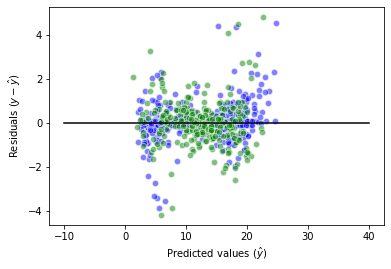

In [26]:
print('\nResidual plot for training data (blue) and test data (green) in Support Vector model:')
_ = plt.scatter(point_svm.predict(X_train_point), y_train_point-point_svm.predict(X_train_point), c='blue', s=40, alpha=0.5, edgecolor='white')
_ = plt.scatter(point_svm.predict(X_test_point), y_test_point-point_svm.predict(X_test_point), c='green', s=40, alpha=0.5, edgecolor='white')
_ = plt.plot([-10,40], [0,0], c='black')
_ = plt.ylabel('Residuals ($y - \hat{y}$)')
_ = plt.xlabel('Predicted values ($\hat{y}$)')

### 5.1.3 Random Forest Regression

In [27]:
# hyperparameter tuning
rf_param_grid = {'criterion':['squared_error', 'absolute_error','poisson'],
                 'n_estimators':[100, 200]}

print("Parameter grid:\n{}".format(rf_param_grid))
rf_grid_search = GridSearchCV(RandomForestRegressor(), rf_param_grid, cv = 5, 
                               return_train_score=True,n_jobs =-1)
rf_grid_search.fit(X_train_point, y_train_point)

print("R2 score: {:.2f}%".format(rf_grid_search.score(X_test_point,y_test_point)))
print("Best parameters: {}".format(rf_grid_search.best_params_))
print("Best cross-validation score: {:.4f}%".format(rf_grid_search.best_score_ *100))


Parameter grid:
{'criterion': ['squared_error', 'absolute_error', 'poisson'], 'n_estimators': [100, 200]}
R2 score: 0.87%
Best parameters: {'criterion': 'squared_error', 'n_estimators': 200}
Best cross-validation score: 86.9618%


In [28]:
# Random Forest regression
point_forest = RandomForestRegressor(criterion= 'squared_error',n_estimators=100)
start = datetime.datetime.now()
point_forest.fit(X_train_point, y_train_point)
end = datetime.datetime.now()
training_time_rf = end-start
y_pred_point = point_forest.predict(X_test_point)

print('Model training time:', training_time_rf)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_point, y_pred_point))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_point, y_pred_point))
print('R2 score:', metrics.r2_score(y_test_point, y_pred_point,multioutput='variance_weighted'))
stderr_ri = math.sqrt(np.mean((y_train_point - point_forest.predict(X_train_point))**2))
print('Standard error:', stderr_ri)

Model training time: 0:00:00.674230
Mean Absolute Error: 1.240133603508772
Mean Squared Error: 2.7946557357979063
R2 score: 0.87664406547985
Standard error: 0.6536787356957499


#### Cross validation

In [29]:
cv_results = cross_validate(point_forest, X_train_point, y_train_point, cv=30)
sorted(cv_results.keys())
RF_r2=cv_results['test_score']
print('R-squared: %.3f (%.3f)' % (np.mean(cv_results['test_score']), np.std(cv_results['test_score'])))

R-squared: 0.864 (0.034)


#### 95% confident interval of RandomForestRegression, the range of our prediction

In [30]:
print('\nPredictions from Random Forest Regression model should be within {:.2f} points at 95% confidence according to training data.'.format(2*stderr_ri))
se_test = math.sqrt(mean_squared_error(y_test_point, point_forest.predict(X_test_point)))
print('Predictions from Random Forest Regression model should be within {:.2f} points at 95% confidence according to test data.'.format(2*se_test))


Predictions from Random Forest Regression model should be within 1.31 points at 95% confidence according to training data.
Predictions from Random Forest Regression model should be within 3.34 points at 95% confidence according to test data.


#### Residual plot


Residual plot for training data (blue) and test data (green) in RandomForest model:


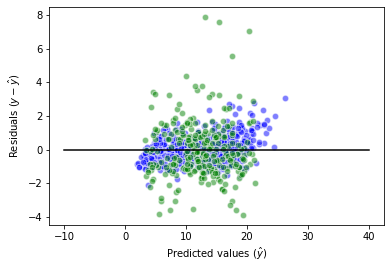

In [31]:
print('\nResidual plot for training data (blue) and test data (green) in RandomForest model:')
_ = plt.scatter(point_forest.predict(X_train_point), y_train_point-point_forest.predict(X_train_point), c='blue', s=40, alpha=0.5, edgecolor='white')
_ = plt.scatter(point_forest.predict(X_test_point), y_test_point-point_forest.predict(X_test_point), c='green', s=40, alpha=0.5, edgecolor='white')
_ = plt.plot([-10,40], [0,0], c='black')
_ = plt.ylabel('Residuals ($y - \hat{y}$)')
_ = plt.xlabel('Predicted values ($\hat{y}$)')

### 5.1.4 Model Complexity Investigation

In [32]:
import random
NUM_SAMPLES = 10
NUM_TRAIN_SETS = 10

def subsample(X, y, sample_size):
    xy_tuples = list(zip(X, y))
    xy_sample = [random.choice(xy_tuples) for _ in range(sample_size)]
    X_sample, y_sample = zip(*xy_sample)
    return X_sample, y_sample

def error(clf, X, y):
    "Calculate error as 1-accuracy"
    return 1-clf.score(X,y)

def bootstrap_error(clf, X_train, y_train, X_test, y_test, sample_size, num_samples=NUM_SAMPLES):
    train_errors = []
    test_errors = []
    for _ in range(num_samples):
        X_sample, y_sample = subsample(X_train, y_train, sample_size)
        clf.fit(X_sample, y_sample)
        train_errors.append(error(clf,X_sample,y_sample))
        test_errors.append(error(clf,X_test,y_test))
    train_error = sum(train_errors)/len(train_errors)
    test_error = sum(test_errors)/len(test_errors)
    return train_error, test_error

def plot_error_curves(clf, X_train, y_train, X_test, y_test, num_train_sets=NUM_TRAIN_SETS, title=None):
    data_sizes = []
    train_errors = []
    test_errors = []
    for i in range(num_train_sets):
        sample_size = int(len(y_train) * (i+1)/num_train_sets)
        train_error, test_error = bootstrap_error(clf, X_train, y_train, X_test, y_test, sample_size)
        data_sizes.append(sample_size)
        train_errors.append(train_error)
        test_errors.append(test_error)
    plt.plot(data_sizes, train_errors, c='b', label='Training error')
    plt.plot(data_sizes, test_errors, c='r', label='Generalisation error')
    plt.ylim(0,1)
    plt.ylabel('Error')
    plt.xlabel('Number of training samples')
    if title:
        plt.title(title)
    plt.legend()
    plt.show()


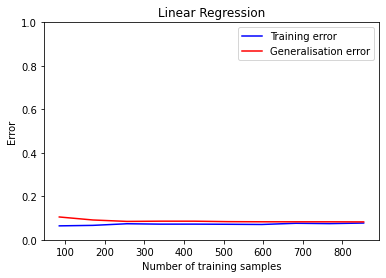

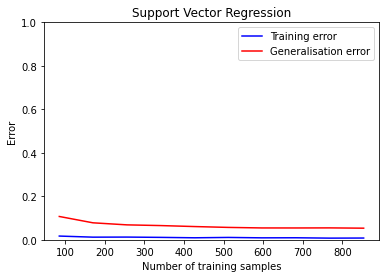

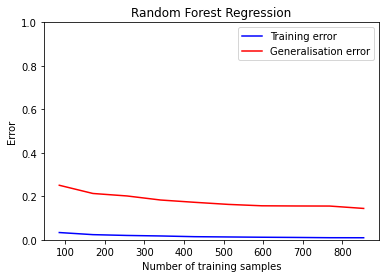

In [33]:
plot_error_curves(point_lr, X_train_point, y_train_point, X_test_point, y_test_point, title='Linear Regression')

plot_error_curves(point_svm, X_train_point, y_train_point, X_test_point, y_test_point, title='Support Vector Regression')

plot_error_curves(point_forest, X_train_point, y_train_point, X_test_point, y_test_point, title='Random Forest Regression')

### 5.1.5 Hypothesis test to see if models are significantly different
LinearRegression model is selected to be the benchmark model. Hypothesis test is performed between LassoRgeression and RidgeRegression with the benchmark model accordingly. A list of R-square score is obtained from 10-fold cross validation and used in the hypothesis test.

Hypothesis test setting:
    H0: both models have the same performance in the prediction of the outcome of the cells. 
    H1: both model has no differences.
    Confidence level: 95%

In [34]:
from scipy.stats import ttest_rel
# two-tailed testing current model != benchmark model
print("P-value for Support Vector Regression model is significantly different from Linear Regression model:",ttest_rel(svr_r2,lr_r2,alternative='two-sided').pvalue)
print("P-value for Random Forest Regression model is significantly different from Linear Regression model:",ttest_rel(RF_r2,lr_r2,alternative='two-sided').pvalue) 
 

P-value for Support Vector Regression model is significantly different from Linear Regression model: 1.5558943669054698e-08
P-value for Random Forest Regression model is significantly different from Linear Regression model: 7.70325950938676e-09


## 5.2 Classification of the PICK

In [35]:
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

###  5.2.1 K-Nearest Neighbour

In [36]:
# hyperparameter tuning
knn_param_grid = {'n_neighbors': [3, 5, 7, 11],
                  'p': [1, 2]}
print("Parameter grid:\n{}".format(knn_param_grid))

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv = 5,
                               return_train_score = True, n_jobs = -1) #n_jobs = -1: to use all processors to run
knn_grid_search.fit(X_train_pick, y_train_pick)

print("Test set score: {:.2f}%".format(knn_grid_search.score(X_test_pick,y_test_pick) * 100))
print("Best parameters: {}".format(knn_grid_search.best_params_)) 
print("Best cross-validation score: {:.2f}%".format(knn_grid_search.best_score_ * 100))


Parameter grid:
{'n_neighbors': [3, 5, 7, 11], 'p': [1, 2]}
Test set score: 54.39%
Best parameters: {'n_neighbors': 7, 'p': 1}
Best cross-validation score: 53.28%


In [37]:
# obtain 10-cross validation f1-score
model_knn = KNeighborsClassifier(n_neighbors = 7, p = 1)

cv_knn = cross_validate(model_knn, X_train_pick, y_train_pick, cv = 30, scoring = 'f1_macro')
cv_results_knn = cv_knn['test_score']
print('F1-score: %.3f (%.3f)' % (np.mean(cv_results_knn), np.std(cv_results_knn)))

F1-score: 0.423 (0.087)


In [38]:
start = datetime.datetime.now()
model_knn.fit(X_train_pick, y_train_pick)
end = datetime.datetime.now()
training_time_knn = end-start
y_pred_knn = model_knn.predict(X_test_pick)

print('Model training time:', training_time_knn)
print("KNN - accuracy on test set:")
print(accuracy_score(y_test_pick, y_pred_knn))
accuracy_forest = accuracy_score(y_test_pick, y_pred_knn)
print(classification_report(y_test_pick, y_pred_knn))

Model training time: 0:00:00.000997
KNN - accuracy on test set:
0.543859649122807
              precision    recall  f1-score   support

         1.0       0.50      0.45      0.48        55
         2.0       0.27      0.22      0.24        72
         3.0       0.65      0.72      0.68       158

    accuracy                           0.54       285
   macro avg       0.47      0.47      0.47       285
weighted avg       0.53      0.54      0.53       285



### 5.2.2 Logistic Regression

In [39]:
# hyperparameter tuning
lor_param_grid = {'C':[1, 5, 10],
                'solver':['sag','lbfgs'],
                'multi_class': ['ovr']}
print("Parameter grid:\n{}".format(lor_param_grid))

lor_grid_search = GridSearchCV(LogisticRegression(),lor_param_grid, cv = 5,
                              return_train_score = True, n_jobs = -1)
lor_grid_search.fit(X_train_pick, y_train_pick)

print("Test set score: {:.2f}%".format(lor_grid_search.score(X_test_pick,y_test_pick)*100))
print("Best parameters: {}".format(lor_grid_search.best_params_)) 
print("Best cross-validation score: {:.2f}%".format(lor_grid_search.best_score_*100))

Parameter grid:
{'C': [1, 5, 10], 'solver': ['sag', 'lbfgs'], 'multi_class': ['ovr']}
Test set score: 61.05%
Best parameters: {'C': 5, 'multi_class': 'ovr', 'solver': 'sag'}
Best cross-validation score: 59.72%


In [40]:
# obtain 10-cross validation f1-score
model_lor = LogisticRegression(C = 1, multi_class = 'ovr', solver = 'sag')
cv_lor = cross_validate(model_lor, X_train_pick, y_train_pick, cv = 30, scoring = 'f1_macro')
cv_results_lor = cv_lor['test_score']
print('F1-score: %.3f (%.3f)' % (np.mean(cv_results_lor), np.std(cv_results_lor)))

F1-score: 0.399 (0.101)


In [41]:
start = datetime.datetime.now()
model_lor.fit(X_train_pick, y_train_pick)
end = datetime.datetime.now()
training_time_lor = end-start
y_pred_lor = model_lor.predict(X_test_pick)

print('Model training time:', training_time_lor)
print("Logistic Regression - accuracy on test set:")
print(accuracy_score(y_test_pick, y_pred_lor))
accuracy_forest = accuracy_score(y_test_pick, y_pred_lor)
print(classification_report(y_test_pick, y_pred_lor))

Model training time: 0:00:00.020912
Logistic Regression - accuracy on test set:
0.6140350877192983
              precision    recall  f1-score   support

         1.0       0.62      0.36      0.46        55
         2.0       0.43      0.08      0.14        72
         3.0       0.62      0.94      0.75       158

    accuracy                           0.61       285
   macro avg       0.56      0.46      0.45       285
weighted avg       0.57      0.61      0.54       285



### 5.2.3 Support Vector Machine

In [42]:
# hyperparameter tuning
svm_param_grid = {'C': [5, 10, 20],
                  'gamma': ['auto','scale'],
                  'kernel': ['poly','sigmoid','rbf']} 

print("Parameter grid:\n{}".format(svm_param_grid))

svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv = 5,
                               return_train_score = True, n_jobs = -1) 
svm_grid_search.fit(X_train_pick, y_train_pick)

print("Test set score: {:.2f}%".format(svm_grid_search.score(X_test_pick,y_test_pick)*100))
print("Best parameters: {}".format(svm_grid_search.best_params_)) 
print("Best cross-validation score: {:.2f}%".format(svm_grid_search.best_score_*100))

Parameter grid:
{'C': [5, 10, 20], 'gamma': ['auto', 'scale'], 'kernel': ['poly', 'sigmoid', 'rbf']}
Test set score: 61.05%
Best parameters: {'C': 20, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score: 59.72%


In [43]:
# obtain 10-cross validation f1-score
model_svm = SVC(C = 20, gamma = 'auto', kernel = 'rbf')
cv_svm = cross_validate(model_svm, X_train_pick, y_train_pick, cv = 30, scoring = 'f1_macro')
cv_results_svm = cv_svm['test_score']
print('F1-score: %.3f (%.3f)' % (np.mean(cv_results_svm), np.std(cv_results_svm)))

F1-score: 0.366 (0.092)


In [44]:
start = datetime.datetime.now()
model_svm.fit(X_train_pick, y_train_pick)
end = datetime.datetime.now()
training_time_svm = end-start
y_pred_svm = model_svm.predict(X_test_pick)

print('Model training time:', training_time_svm)
print("Support vector machine - accuracy on test set:")
print(accuracy_score(y_test_pick, y_pred_svm))
accuracy_forest = accuracy_score(y_test_pick, y_pred_svm)
print(classification_report(y_test_pick, y_pred_svm))

Model training time: 0:00:00.032912
Support vector machine - accuracy on test set:
0.6105263157894737
              precision    recall  f1-score   support

         1.0       0.59      0.42      0.49        55
         2.0       0.00      0.00      0.00        72
         3.0       0.61      0.96      0.75       158

    accuracy                           0.61       285
   macro avg       0.40      0.46      0.41       285
weighted avg       0.45      0.61      0.51       285



C:\ProgramData\Anaconda3\envs\DNN_env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\DNN_env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\DNN_env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 5.2.4 Confusion Matrix

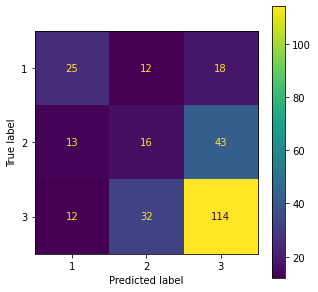

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix_knn = confusion_matrix(y_test_pick, y_pred_knn)
conf_matrix_lr = confusion_matrix(y_test_pick, y_pred_lor)
conf_matrix_svm = confusion_matrix(y_test_pick, y_pred_svm)

label = [1,2,3]
display_knn = ConfusionMatrixDisplay(conf_matrix_knn, display_labels = label)
display_lr = ConfusionMatrixDisplay(conf_matrix_lr, display_labels = label)
display_svm = ConfusionMatrixDisplay(conf_matrix_svm, display_labels = label)

fig, ax = plt.subplots(figsize=(5,5))
display_knn.plot(ax=ax)
# plt.tight_layout()
plt.show()

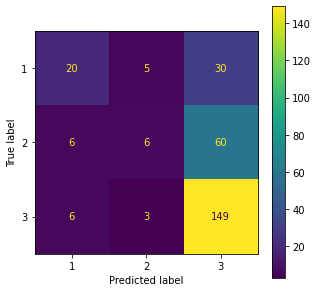

In [46]:
fig, ax = plt.subplots(figsize=(5,5))
display_lr.plot(ax=ax)
# plt.tight_layout()
plt.show()

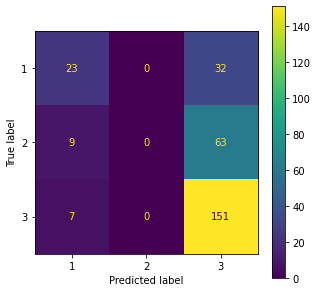

In [47]:
fig, ax = plt.subplots(figsize=(5,5))
display_svm.plot(ax=ax)
# plt.tight_layout()
plt.show()

### 5.2.5 Model Complexity Investigation

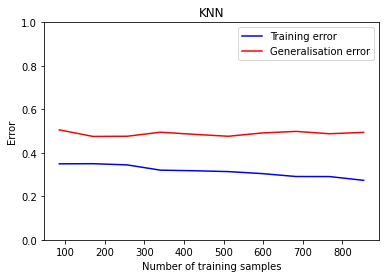

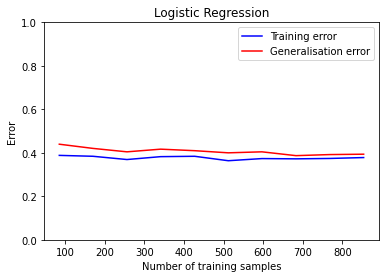

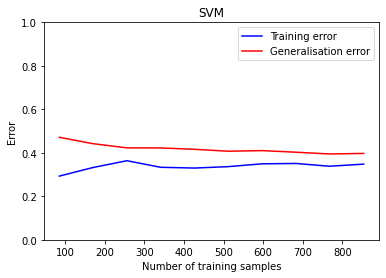

In [48]:
plot_error_curves(model_knn, X_train_pick, y_train_pick, X_test_pick, y_test_pick, title='KNN')

plot_error_curves(model_lor, X_train_pick, y_train_pick, X_test_pick, y_test_pick, title='Logistic Regression')

plot_error_curves(model_svm, X_train_pick, y_train_pick, X_test_pick, y_test_pick, title='SVM')


### 5.2.6 Hypothesis test to see if models are significantly different
K-Nearest Neighbour model is selected to be the benchmark model. Hypothesis test is performed between Logistic Regression and SVM with the benchmark model accordingly. A list of R-square score is obtained from 10-fold cross validation and used in the hypothesis test.

Hypothesis test setting:
    H0: both models have the same performance in the prediction of the outcome of the cells. 
    H1: current model has a better performance than the benchmark model.
    Significance level = 95%

In [49]:
from scipy.stats import ttest_rel
# two-tailed testing current model != benchmark model
print("P-value for Logistic Regression model is signigicantly different from KNN model:",ttest_rel(cv_results_lor,cv_results_knn,alternative = 'two-sided').pvalue) # reject H0, Retain H1
print("P-value for SVM model is signigicantly different from KNN model:",ttest_rel(cv_results_svm,cv_results_knn,alternative = 'two-sided').pvalue) # reject H0, Retain H1

P-value for Logistic Regression model is signigicantly different from KNN model: 0.35974158357450803
P-value for SVM model is signigicantly different from KNN model: 0.010365023654221754
